<a href="https://colab.research.google.com/github/amshukethireddy/HeartFailurePrediction/blob/main/HeartFailurePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

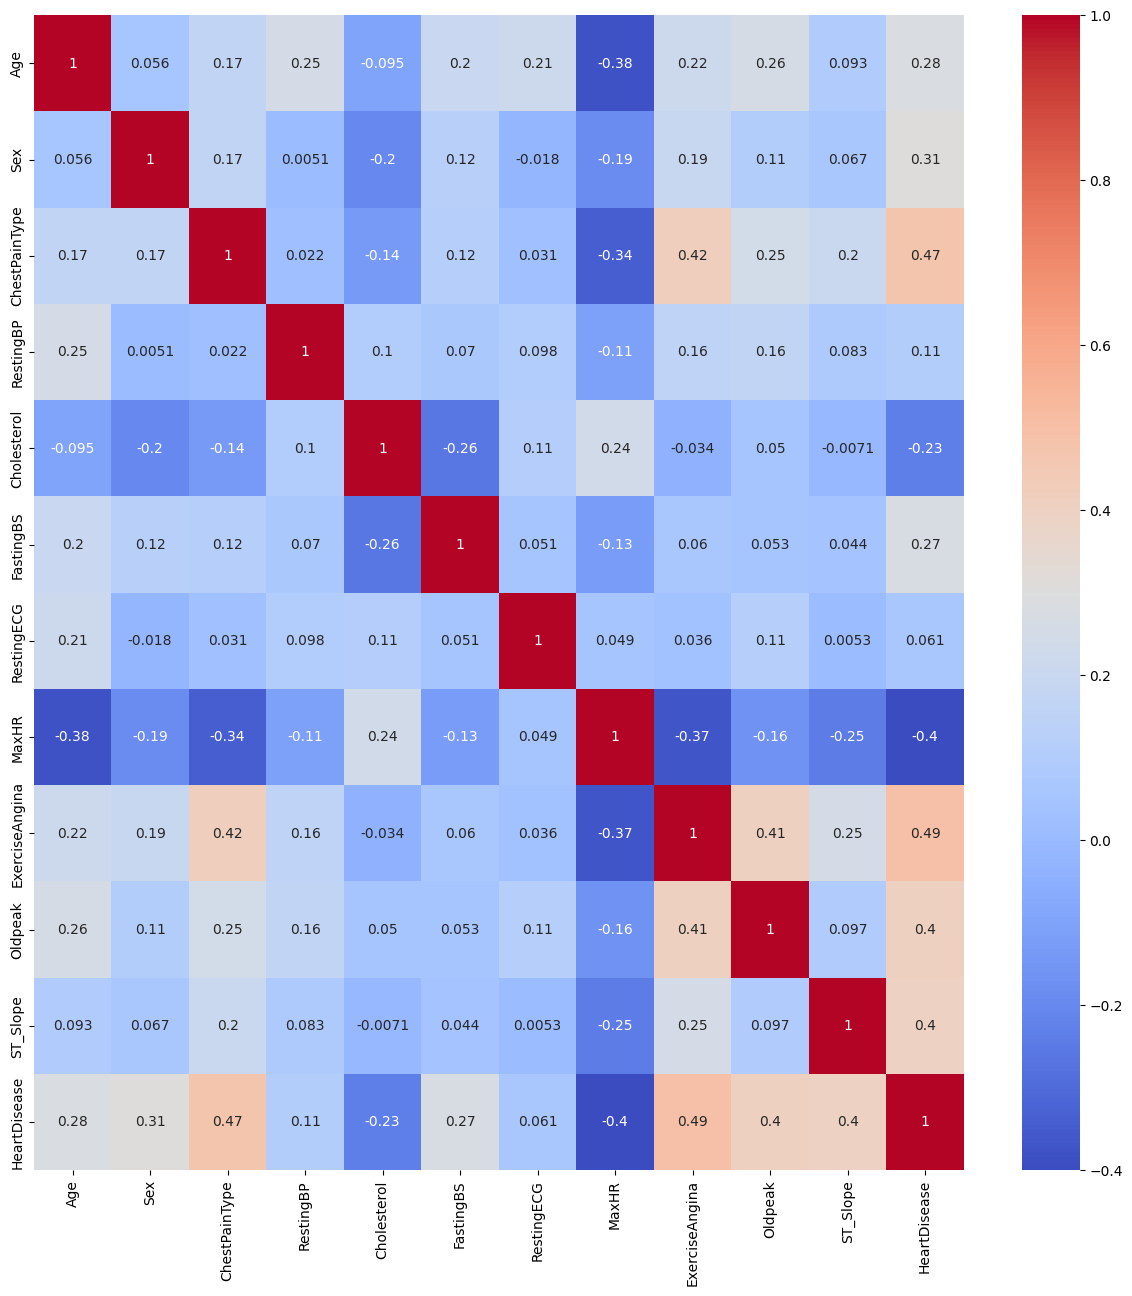

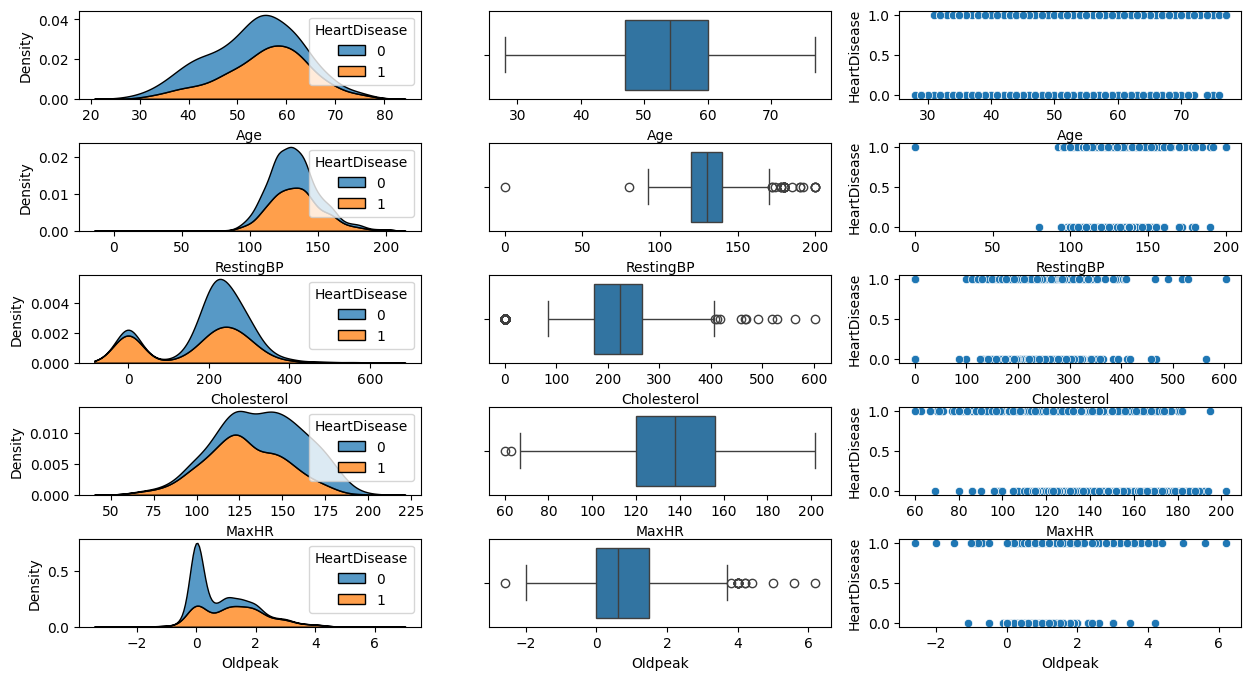

<ipython-input-1-cf497584b12b>:109: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[row, col].set_xticklabels(axis[row, col].get_xticklabels(), rotation=45, ha="right", fontsize=10)
<ipython-input-1-cf497584b12b>:109: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[row, col].set_xticklabels(axis[row, col].get_xticklabels(), rotation=45, ha="right", fontsize=10)
<ipython-input-1-cf497584b12b>:109: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[row, col].set_xticklabels(axis[row, col].get_xticklabels(), rotation=45, ha="right", fontsize=10)
<ipython-input-1-cf497584b12b>:109: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[row, col].set_xticklabels(axis[row, col].get_xticklabels(), rotation=45, ha="right", fontsize=10)
<ipython-input-1-cf497584b12b>:109: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[row, col].set_xtic

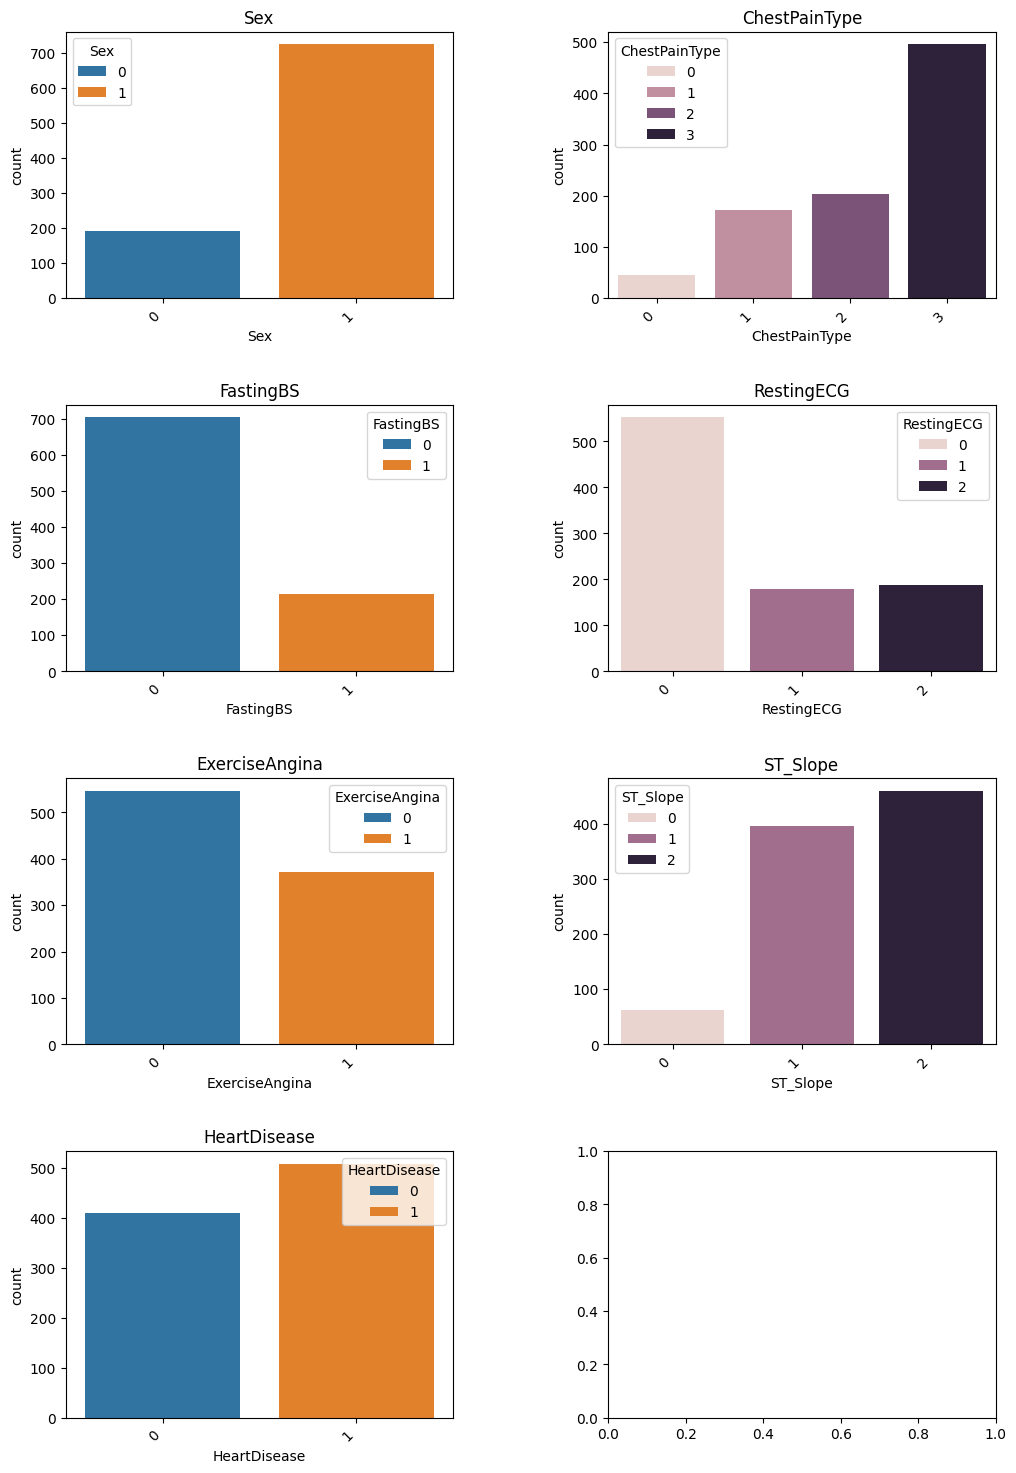

Logistic Regression:
confusion Matrix :
 [[66 17]
 [12 89]]
accuracy: 0.842391304347826
f1 Score: 0.8599033816425121



Support Vector Machine:
confusion Matrix :
 [[68 15]
 [ 9 92]]
accuracy: 0.8695652173913043
f1 Score: 0.8846153846153846



Knn Classifier:
confusion Matrix :
 [[68 15]
 [13 88]]
accuracy: 0.8478260869565217
f1 Score: 0.8627450980392157



decision Tree Classifier:
confusion Matrix :
 [[64 19]
 [11 90]]
accuracy: 0.8369565217391305
f1 Score: 0.8571428571428572





In [1]:
#Heart Failure prediction
''' To predict the occurence of heart failure based on the features(Sex,chestPainType,BloodSugar ...) using train_test_split

'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



#Exploring Numeric data
def plot_numeric(data,numeric_cols):
  i = 0
  fig, ax = plt.subplots(5, 3, figsize=(15, 8))
  plt.subplots_adjust(hspace = 0.5)
  for num_col in numeric_cols:
    #KDE Plot
    sns.kdeplot(x = num_col, hue = 'HeartDisease' , data = data, multiple = 'stack' , ax=ax[i, 0])
    #Box Plot
    sns.boxplot(x = num_col, data = data , ax=ax[i, 1])
    #Scatter Plot
    sns.scatterplot(x = num_col, y = 'HeartDisease', data = data , ax=ax[i, 2])
    i = i + 1
  plt.show()



#Logistic regression
def logistic(x_train,x_test,y_train,y_test):
  logR=LogisticRegression()
  logR.fit(x_train,y_train)
  predictions=logR.predict(x_test)
  acc=accuracy_score(y_test,predictions)
  print('Logistic Regression:')
  cm=confusion_matrix(y_test,predictions)
  print('confusion Matrix :\n',cm)
  print('accuracy:' ,acc)
  f1=f1_score(y_test,predictions)
  print('f1 Score:',f1)
  print('\n\n')


#support vector machine
def supportVector(x_train,x_test,y_train,y_test):
  svc=SVC()
  svc.fit(x_train,y_train)
  predictions=svc.predict(x_test)
  acc=accuracy_score(y_test,predictions)
  print('Support Vector Machine:')
  cm=confusion_matrix(y_test,predictions)
  print('confusion Matrix :\n',cm)
  print('accuracy:' ,acc)
  f1=f1_score(y_test,predictions)
  print('f1 Score:',f1)
  print('\n\n')

#Knn classifier
def knn(x_train,x_test,y_train,y_test):
  knn=KNeighborsClassifier()
  knn.fit(x_train,y_train)
  predictions=knn.predict(x_test)
  acc=accuracy_score(y_test,predictions)
  cm=confusion_matrix(y_test,predictions)
  print('Knn Classifier:')
  print('confusion Matrix :\n',cm)
  print('accuracy:' ,acc)
  f1=f1_score(y_test,predictions)
  print('f1 Score:',f1)
  print('\n\n')

#Decision Tree Classifier
def decisionTree(x_train,x_test,y_train,y_test):
  DTree=DecisionTreeClassifier()
  DTree.fit(x_train,y_train)
  predictions=DTree.predict(x_test)
  acc=accuracy_score(y_test,predictions)
  cm=confusion_matrix(y_test,predictions)
  print('decision Tree Classifier:')
  print('confusion Matrix :\n',cm)
  print('accuracy:' ,acc)
  f1=f1_score(y_test,predictions)
  print('f1 Score:',f1)
  print('\n\n')

#To plot correlation graph
def corrPlot(data):
    corr_matrix=data.corr(method='pearson')
    plt.figure(figsize=(15,15))
    sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")


#exploring categorical data
def plot_catego(data,categorical_cols):
  fig, axis = plt.subplots(4, 2, figsize=(12, 18))
  plt.subplots_adjust(hspace=0.4, wspace=0.4)
  for i, column_name in enumerate(categorical_cols + ['HeartDisease']):
    row = i // 2
    col = i % 2
    sns.countplot(ax=axis[row, col], x=data[column_name], hue=data[column_name])
    axis[row, col].set_title(column_name)
    axis[row, col].set_xticklabels(axis[row, col].get_xticklabels(), rotation=45, ha="right", fontsize=10)
    i=i+1
  plt.show()


def main():
  data=pd.read_csv('heart.csv')#to read the data
  #to explore the data
  #data.describe()
  #data.isnull().sum()
  print(data)
  # Convert Categorical Variables to Numerical
  data["Sex"]=data["Sex"].map({"M":1,"F":0})
  data["ChestPainType"]=data["ChestPainType"].map({"TA":0,"ATA":1,"NAP":2,"ASY":3})
  data["RestingECG"]=data["RestingECG"].map({"Normal":0,"ST":1,"LVH":2})
  data["ExerciseAngina"]=data["ExerciseAngina"].map({"Y":1,"N":0})
  data["ST_Slope"]=data["ST_Slope"].map({"Up":1,"Down":0,"Flat":2})
  corrPlot(data) #to plot correlation matrix to identify the independent variables
  # Plot Numerical and Categorical variables to see and analyse the trends
  numeric_cols=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
  categorical_cols=['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']
  plot_numeric(data,numeric_cols)
  plot_catego(data,categorical_cols)
  # to remove the target variable
  x=data.drop('HeartDisease',axis=1)
  #to assign target variable as the output variable
  y=data['HeartDisease']
  #using standard scalar to scale the values
  scaler=StandardScaler()
  x=scaler.fit_transform(x)
  #to divide the traing set into training and testing data
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
  logistic(x_train,x_test,y_train,y_test)
  supportVector(x_train,x_test,y_train,y_test)
  knn(x_train,x_test,y_train,y_test)
  decisionTree(x_train,x_test,y_train,y_test)




if __name__ == "__main__" :
    main()


     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

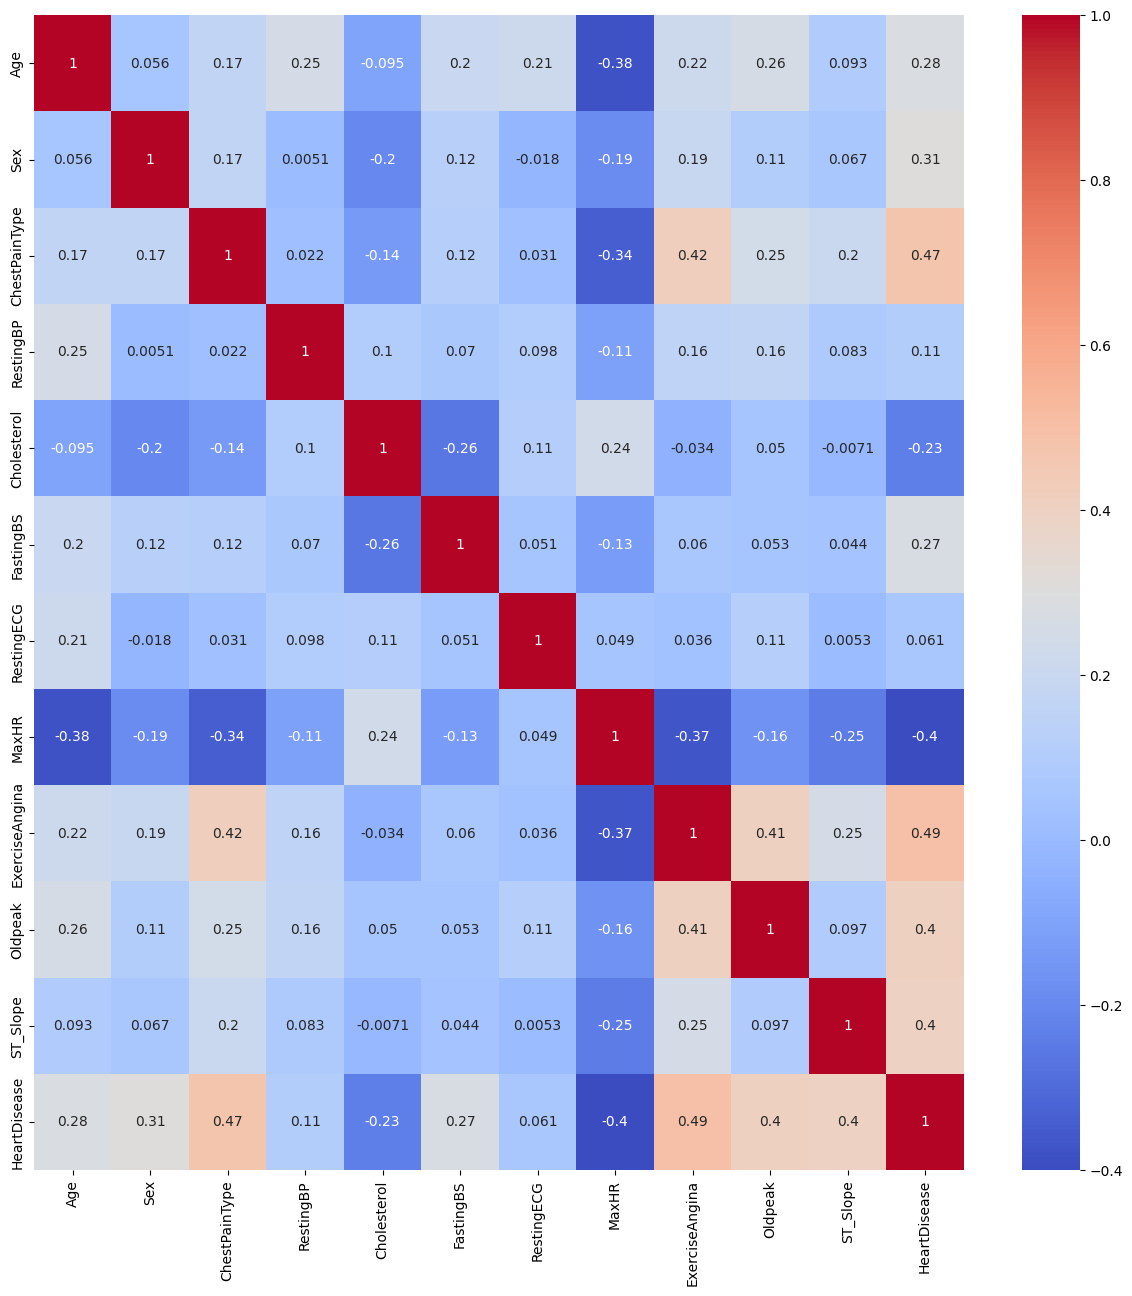

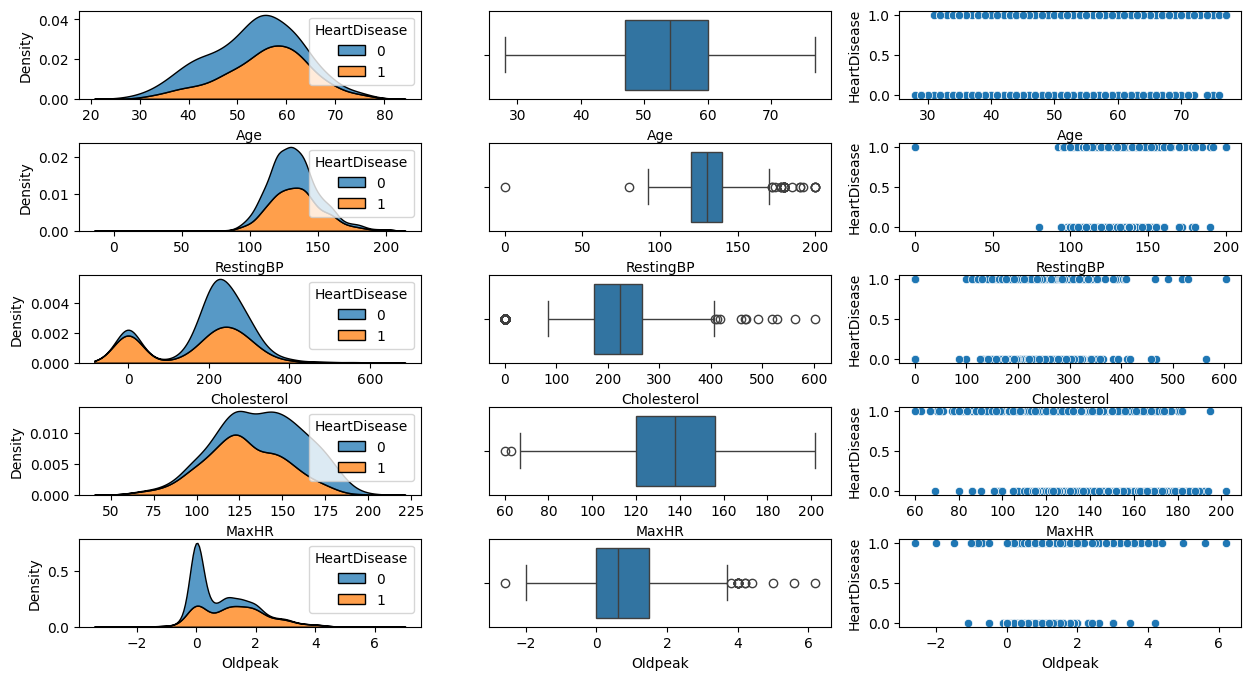

<ipython-input-2-c6ca0da816dd>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[row, col].set_xticklabels(axis[row, col].get_xticklabels(), rotation=45, ha="right", fontsize=10)
<ipython-input-2-c6ca0da816dd>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[row, col].set_xticklabels(axis[row, col].get_xticklabels(), rotation=45, ha="right", fontsize=10)
<ipython-input-2-c6ca0da816dd>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[row, col].set_xticklabels(axis[row, col].get_xticklabels(), rotation=45, ha="right", fontsize=10)
<ipython-input-2-c6ca0da816dd>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[row, col].set_xticklabels(axis[row, col].get_xticklabels(), rotation=45, ha="right", fontsize=10)
<ipython-input-2-c6ca0da816dd>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[row, col].set_xticklabe

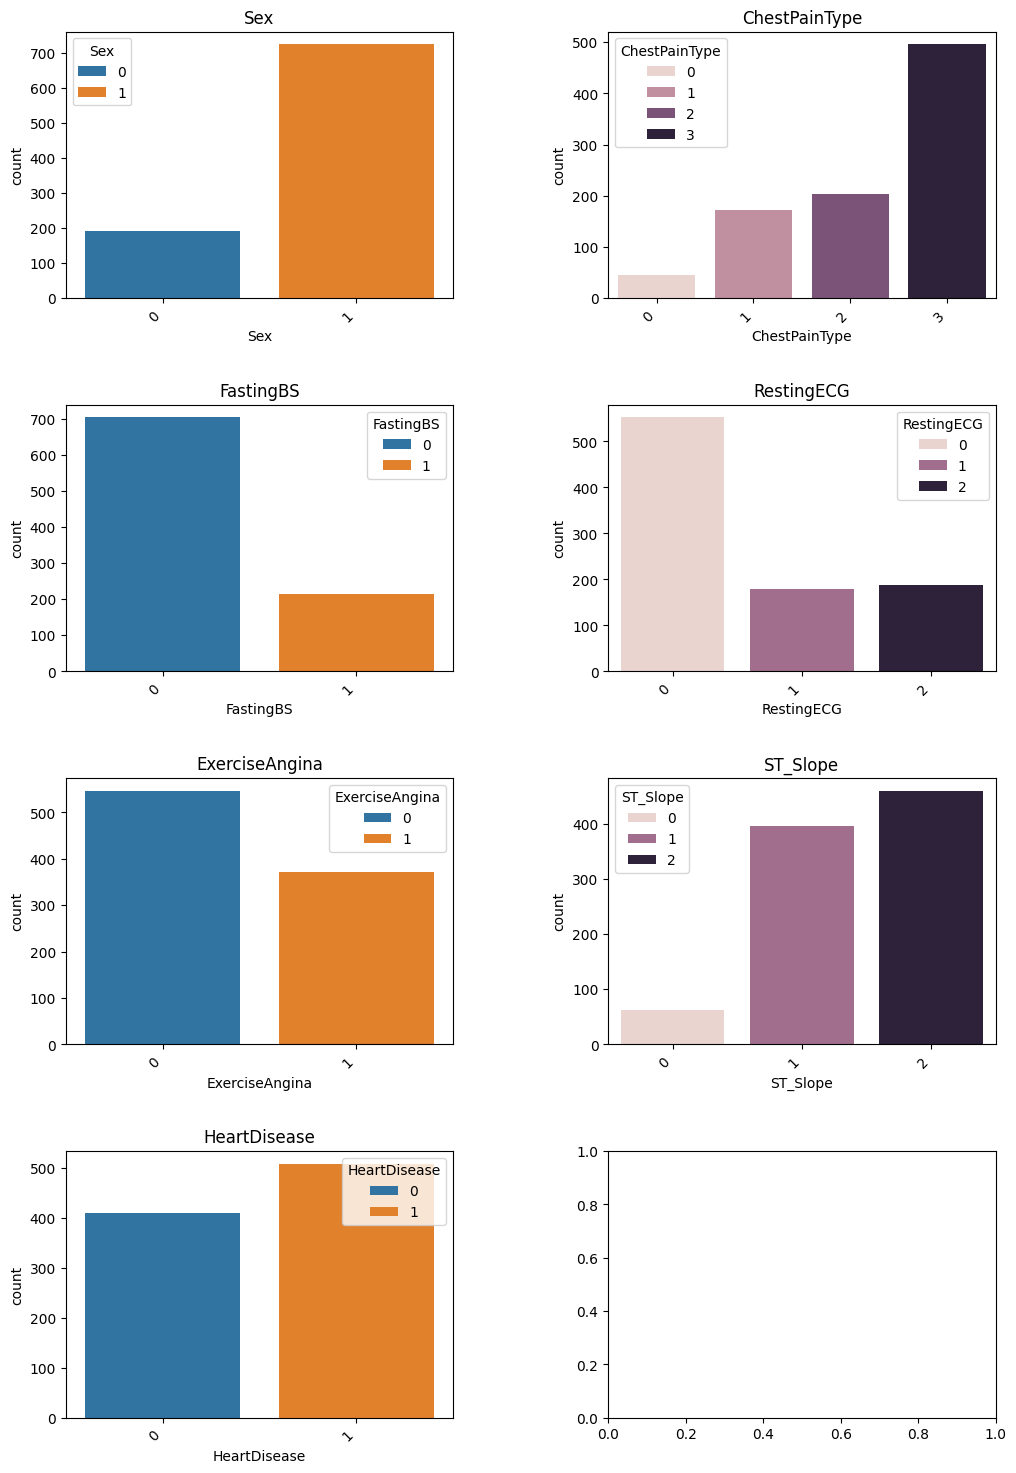

Logistic Regression:
Cross Validation Scores:  [0.80434783 0.82065217 0.80978261 0.84153005 0.77595628]
Average CV Score:  0.8104537894986933



Support Vector :
Cross Validation Scores:  [0.86413043 0.88043478 0.83695652 0.81967213 0.78688525]
Average CV Score:  0.8376158232359231



Decision Tree :
Cross Validation Scores:  [0.82608696 0.82608696 0.77717391 0.72131148 0.69945355]
Average CV Score:  0.7700225706818722



K Neighbors :
Cross Validation Scores:  [0.80978261 0.83695652 0.8423913  0.80874317 0.7704918 ]
Average CV Score:  0.8136730814920409





In [2]:
#Heart Failure prediction
''' To predict the occurence of heart failure based on the features(Sex,chestPainType,BloodSugar ...) using cross deviation

'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score




#Exploring Numeric data
def plot_numeric(data,numeric_cols):
  i = 0
  fig, ax = plt.subplots(5, 3, figsize=(15, 8))
  plt.subplots_adjust(hspace = 0.5)
  for num_col in numeric_cols:
    #KDE Plot
    sns.kdeplot(x = num_col, hue = 'HeartDisease' , data = data, multiple = 'stack' , ax=ax[i, 0])
    #Box Plot
    sns.boxplot(x = num_col, data = data , ax=ax[i, 1])
    #Scatter Plot
    sns.scatterplot(x = num_col, y = 'HeartDisease', data = data , ax=ax[i, 2])
    i = i + 1
  plt.show()

#To plot correlation graph
def corrPlot(data):
    corr_matrix=data.corr(method='pearson')
    plt.figure(figsize=(15,15))
    sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")


#exploring categorical data
def plot_catego(data,categorical_cols):
  fig, axis = plt.subplots(4, 2, figsize=(12, 18))
  plt.subplots_adjust(hspace=0.4, wspace=0.4)
  for i, column_name in enumerate(categorical_cols + ['HeartDisease']):
    row = i // 2
    col = i % 2
    sns.countplot(ax=axis[row, col], x=data[column_name], hue=data[column_name])
    axis[row, col].set_title(column_name)
    axis[row, col].set_xticklabels(axis[row, col].get_xticklabels(), rotation=45, ha="right", fontsize=10)
    i=i+1
  plt.show()


#Logistic Regression
def logistic(x,y,sk_folds):
  lr=LogisticRegression(random_state=42)
  scores = cross_val_score(lr, x, y, cv = sk_folds)
  print("Logistic Regression:")
  print("Cross Validation Scores: ", scores)
  print("Average CV Score: ", scores.mean())
  print("\n\n")

#Support Vector Classifier
def svc(x,y,sk_folds):
  svm=SVC(random_state=42)
  scores = cross_val_score(svm, x, y, cv = sk_folds)
  print("Support Vector :")
  print("Cross Validation Scores: ", scores)
  print("Average CV Score: ", scores.mean())
  print("\n\n")

#KNeighbors Classifier
def knn(x,y,sk_folds):
  knn=KNeighborsClassifier()
  scores = cross_val_score(knn, x, y, cv = sk_folds)
  print('K Neighbors :')
  print("Cross Validation Scores: ", scores)
  print("Average CV Score: ", scores.mean())
  print("\n\n")

#decision Tree Classifier
def decision_tree(x,y,sk_folds):
  dt=DecisionTreeClassifier()
  scores = cross_val_score(dt, x, y, cv = sk_folds)
  print("Decision Tree :")
  print("Cross Validation Scores: ", scores)
  print("Average CV Score: ", scores.mean())
  print("\n\n")



def main():
  data=pd.read_csv('heart.csv')# Read data
  # Explore Data
  #data.describe()
  #data.isnull().sum()
  print(data)
  # Convert Categorical Variables to Numerical
  data["Sex"]=data["Sex"].map({"M":1,"F":0})
  data["ChestPainType"]=data["ChestPainType"].map({"TA":0,"ATA":1,"NAP":2,"ASY":3})
  data["RestingECG"]=data["RestingECG"].map({"Normal":0,"ST":1,"LVH":2})
  data["ExerciseAngina"]=data["ExerciseAngina"].map({"Y":1,"N":0})
  data["ST_Slope"]=data["ST_Slope"].map({"Up":1,"Down":0,"Flat":2})
  # Plot correlation between numerical variables to see if any two variables are dependent
  corrPlot(data)
  # Plot Numerical and Categorical variables to see and analyse the trends
  numeric_cols=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
  categorical_cols=['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']
  plot_numeric(data,numeric_cols)
  plot_catego(data,categorical_cols)
  #remove the target variable
  x=data.drop('HeartDisease',axis=1)
  #set target variable as the output
  y=data['HeartDisease']
  #using the Standard Scalar to scale the values
  scaler=StandardScaler()
  x=scaler.fit_transform(x)
  #using cross deviation to obtain effecient and reliable results
  sk_folds = StratifiedKFold(n_splits = 5)#using stratifiedKFold such that each fold of dataset has the same proportion of observations with a given label.
  logistic(x,y,sk_folds)
  svc(x,y,sk_folds)
  decision_tree(x,y,sk_folds)
  knn(x,y,sk_folds)




if __name__ == "__main__" :
    main()
